<a href="https://colab.research.google.com/github/brianisinga/jupyterWorkflow/blob/main/tf_img.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**load and preprocess images**

In [ ]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow as tf
import tensorflow_datasets as tfds

In [2]:
#download flower datasets
#flowers_photos/
  daisy/
  dandelion/
  roses/
  sunflowers/
  tulips/

flowers_photos/

  daisy/

  dandelion/

  roses/

  sunflowers/

  tulips/

In [3]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
archive = tf.keras.utils.get_file(origin=dataset_url, extract=True)
data_dir = pathlib.Path(archive).with_suffix('')

228813984/228813984 [==============================] - 1s 0us/step


In [6]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


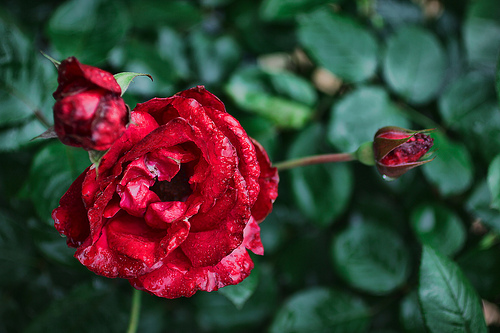

In [7]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[0]))

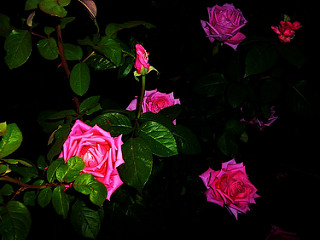

In [9]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[1]))

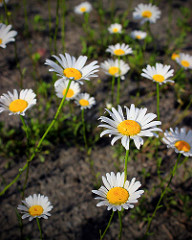

In [11]:
daisy =list(data_dir.glob('daisy/*'))
PIL.Image.open(str(daisy[100]))

**load data using keras utility**

In [12]:
#create a dataset
#define parameters for the loader
batch_size = 32
img_height = 180
img_width = 180

**validation split**

In [17]:
#80% of the images for training and 20% for validation
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = 'training',
    seed = 123,
    image_size=(img_height, img_width),
    batch_size = batch_size

)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [18]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='validation',
    seed = 123,
    image_size= (img_height, img_width),
    batch_size = batch_size
)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [19]:
#finding class names
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


**visualize the data**